Accuracy of KNN Classifier is :  1.0


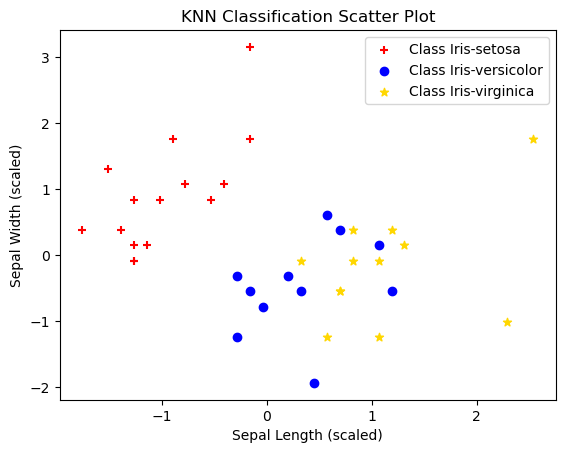

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("iris_dataset (2).csv")
X = df[["sepal_length","sepal_width","petal_length","petal_width"]]
y = df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train_enc)
ypred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test_enc,ypred)
print("Accuracy of KNN Classifier is : ",accuracy)

labels = encoder.classes_

markers = ["+", "o", "*"]
colors = ["red", "blue", "gold"]

for i, label in enumerate(labels):
    class_points = (ypred == i)
    plt.scatter(X_test_scaled[class_points, 0], X_test_scaled[class_points, 1], label=f'Class {label}', marker=markers[i], color=colors[i])
    plt.title("KNN Classification Scatter Plot")
    plt.xlabel("Sepal Length (scaled)")
    plt.ylabel("Sepal Width (scaled)")
    plt.legend()